# Biochemistry Task 2.4

---



- **The functional impact was computed as SIFT scores and the structural impact was calculated as FoldX Score (in kCal/mol).**

- **We imported both sift and foldx datasets, in both datasets,we created a column [specific_Protein_aa] which is a cantenation of the [Protein] and [Amino_acid] columns , Using the specific_Protein_aa column, we merged sift and foldx dataset into one final dataframe.**

---



In [2]:

import pandas as pd


# Load the datasets
sift_df = pd.read_csv("sift2.csv")
foldx_df = pd.read_csv("foldX2.csv")

# Create the specific_Protein_aa column in both DataFrames
sift_df['specific_Protein_aa'] = sift_df['Protein'] + '_' + sift_df['Amino_Acid']
foldx_df['specific_Protein_aa'] = foldx_df['Protein'] + '_' + foldx_df[' Amino_Acid']

# Merge the datasets based on the specific_Protein_aa column
merged_df = pd.merge(sift_df, foldx_df, on='specific_Protein_aa', suffixes=('_sift', '_foldx'))
merged_df


,Protein_sift,Amino_Acid,sift_Score,specific_Protein_aa,Protein_foldx,Amino_Acid,foldX_Score
0,A5A607,K60Q,0.197799,A5A607_K60Q,A5A607,K60Q,0.517100
1,A5A607,Y56C,0.174970,A5A607_Y56C,A5A607,Y56C,0.728700
2,A5A607,Y56S,0.415581,A5A607_Y56S,A5A607,Y56S,0.842120
3,P00350,A117S,0.401519,P00350_A117S,P00350,A117S,-0.098540
4,P00350,A117T,0.282769,P00350_A117T,P00350,A117T,0.923520
...,...,...,...,...,...,...,...
75332,Q93K97,S190P,0.017680,Q93K97_S190P,Q93K97,S190P,-1.778610
75333,Q93K97,T124I,0.169846,Q93K97_T124I,Q93K97,T124I,-0.973832
75334,Q93K97,T23I,0.094208,Q93K97_T23I,Q93K97,T23I,-0.242378
75335,Q93K97,V145L,1.000000,Q93K97_V145L,Q93K97,V145L,-0.249012


- **According to the authors;**

  - A FoldX score greater than 2 kCal/mol is deleterious
  - A SIFT Score below 0.05 is deleterious

- **Using the criteria above,  we found all mutations that have a SIFT score below 0.05 and FoldX Score above 2 .**

---



In [3]:
df_deleterious = merged_df[(merged_df["sift_Score"] < 0.05) & (merged_df["foldX_Score"] > 2)]
df_deleterious


,Protein_sift,Amino_Acid,sift_Score,specific_Protein_aa,Protein_foldx,Amino_Acid,foldX_Score
82,P00350,G48C,0.031864,P00350_G48C,P00350,G48C,2.25298
100,P00350,L115F,0.028872,P00350_L115F,P00350,L115F,3.12672
102,P00350,L204F,0.009560,P00350_L204F,P00350,L204F,3.31406
103,P00350,L208R,0.027592,P00350_L208R,P00350,L208R,4.38690
209,P00363,I150F,0.048688,P00363_I150F,P00363,I150F,9.18496
...,...,...,...,...,...,...,...
75267,Q6BEX0,V211F,0.013334,Q6BEX0_V211F,Q6BEX0,V211F,12.81140
75277,Q6BF16,A97V,0.039486,Q6BF16_A97V,Q6BF16,A97V,2.52316
75281,Q6BF16,G80S,0.000000,Q6BF16_G80S,Q6BF16,G80S,4.58514
75311,Q6BF17,G250C,0.028912,Q6BF17_G250C,Q6BF17,G250C,3.59832


- **We selected the first amino acid from the 'Amino_Acid' column ad put them in separte column**

---



In [4]:
# Select the first amino acid from the 'Amino_Acid' column
df_deleterious["First_AA"] = df_deleterious["Amino_Acid"].str[0]
df_deleterious



<ipython-input-4-b492bf0e0bf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deleterious["First_AA"] = df_deleterious["Amino_Acid"].str[0]


,Protein_sift,Amino_Acid,sift_Score,specific_Protein_aa,Protein_foldx,Amino_Acid,foldX_Score,First_AA
82,P00350,G48C,0.031864,P00350_G48C,P00350,G48C,2.25298,G
100,P00350,L115F,0.028872,P00350_L115F,P00350,L115F,3.12672,L
102,P00350,L204F,0.009560,P00350_L204F,P00350,L204F,3.31406,L
103,P00350,L208R,0.027592,P00350_L208R,P00350,L208R,4.38690,L
209,P00363,I150F,0.048688,P00363_I150F,P00363,I150F,9.18496,I
...,...,...,...,...,...,...,...,...
75267,Q6BEX0,V211F,0.013334,Q6BEX0_V211F,Q6BEX0,V211F,12.81140,V
75277,Q6BF16,A97V,0.039486,Q6BF16_A97V,Q6BF16,A97V,2.52316,A
75281,Q6BF16,G80S,0.000000,Q6BF16_G80S,Q6BF16,G80S,4.58514,G
75311,Q6BF17,G250C,0.028912,Q6BF17_G250C,Q6BF17,G250C,3.59832,G


- **We investigated the amino acid with the most functional and structural impact.**

- **we typically analyzed the distribution of SIFT and FoldX scores for each amino acid substitution.  Since we merged the dataframes already, we can see the relationship between scores, and then analyze which amino acids have the highest impact.**

---




In [5]:

# Group data by amino acid and calculate the mean SIFT and FoldX scores.
# Then we look for amino acids with the lowest SIFT scores (most deleterious) and the highest FoldX scores (most destabilizing).

amino_acid_stats = merged_df.groupby('Amino_Acid').agg({'sift_Score': 'mean', 'foldX_Score': 'mean'})
print(amino_acid_stats)

# Find the amino acid with the lowest mean SIFT score.
most_deleterious_aa = amino_acid_stats['sift_Score'].idxmin()
print(f"\nAmino acid with the lowest average SIFT score (most deleterious): {most_deleterious_aa}")

# Find the amino acid with the highest mean FoldX score.
most_destabilizing_aa = amino_acid_stats['foldX_Score'].idxmax()
print(f"Amino acid with the highest average FoldX score (most destabilizing): {most_destabilizing_aa}")

            sift_Score  foldX_Score
Amino_Acid                         
A100D         0.004536     8.175000
A100E         0.541770     0.186260
A100G         0.213538    -0.268475
A100S         0.279384     0.808316
A100T         0.299547     0.787087
...                ...          ...
Y98S          0.000000     3.321920
Y99C          0.161149     2.146920
Y99H          0.545798     0.952126
Y9F           1.000000     0.075680
Y9N           0.313767     2.006696

[35396 rows x 2 columns]

Amino acid with the lowest average SIFT score (most deleterious): A116G
Amino acid with the highest average FoldX score (most destabilizing): G101W


- **We generated a frequency table for all the amino acids :**

---



In [6]:

# Group by amino acid and count occurrences
amino_acid_counts = df_deleterious['First_AA'].value_counts()

# Create a frequency table
frequency_table = pd.DataFrame({'Amino Acid': amino_acid_counts.index, 'Frequency': amino_acid_counts.values})

frequency_table


,Amino Acid,Frequency
0,G,1307
1,L,739
2,A,640
3,P,470
4,V,380
5,R,227
6,I,212
7,Y,172
8,D,171
9,F,169


- **Visualizations**

---



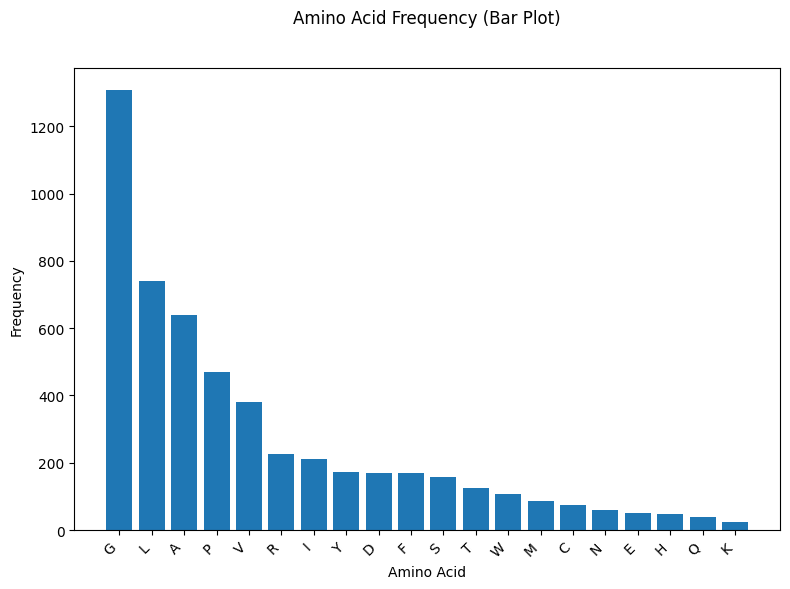

In [9]:
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(8, 6))
plt.bar(frequency_table['Amino Acid'], frequency_table['Frequency'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Frequency (Bar Plot)', y=1.08)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


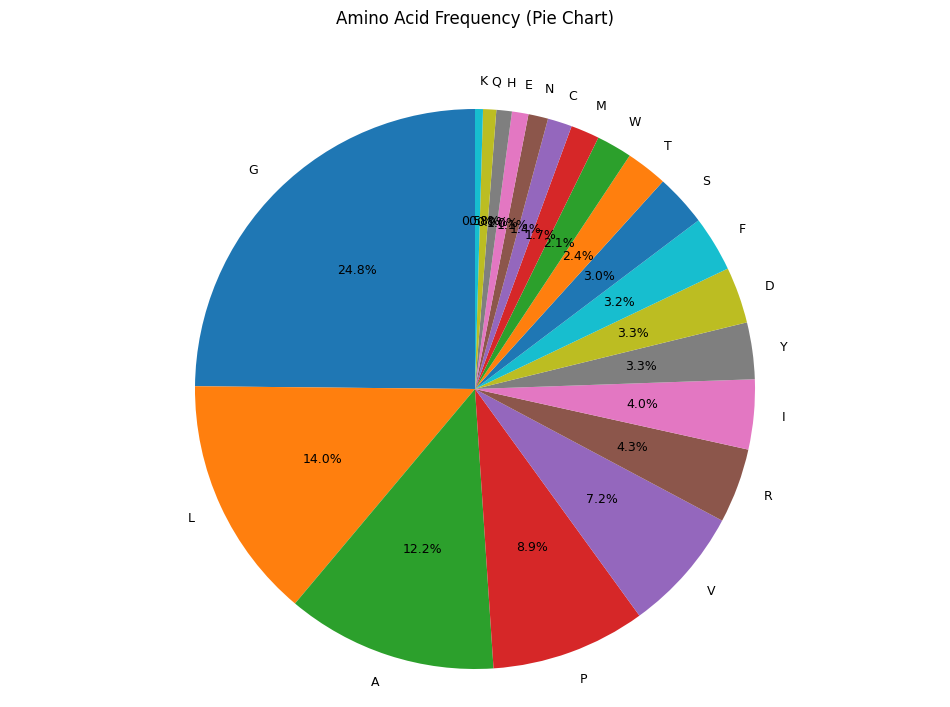

In [10]:


# Pie chart
plt.figure(figsize=(12, 8))
plt.pie(frequency_table['Frequency'], labels=frequency_table['Amino Acid'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9}) # Reduce fontsize

plt.title('Amino Acid Frequency (Pie Chart)', y=1.08)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


 **describe the amino acid with the highest impact on protein structure and function :**

---




   - G101W (Glycine to Tryptophan at position 101) has the highest impact on protein structure. The change from a small, flexible Glycine to a large, bulky Tryptophan introduces a significant steric clash, disrupting the protein's folding and stability. This structural instability can then cascade into functional impairment.

   - A116G (Alanine to Glycine at position 116) has the highest impact on protein function. This means that even if the structure is not heavily impacted, the function of the protein will be.



Therefore, the G101W change has the highest structural impact, and the A116G change has the highest functional impact. If forced to choose one amino acid with the highest overall impact, the G101W change likely has the most severe overall impact, as a drastically unstable protein is unlikely to function correctly.

---








- **What to say about the structural property and functional property of amino acids with more than 100 occurences.**

---



In [12]:

# Filter for amino acids with more than 100 occurrences
amino_acids_over_100 = frequency_table[frequency_table['Frequency'] > 100]
print(amino_acids_over_100)

# Analyze the structural and functional properties of these amino acids
for aa in amino_acids_over_100['Amino Acid']:
    full_aa = merged_df.loc[merged_df['Amino_Acid'].str.startswith(aa), 'Amino_Acid'].iloc[0]

    aa_stats = amino_acid_stats.loc[full_aa]
    print(f"\nAmino Acid: {aa}")
    print(f"  Average SIFT score: {aa_stats['sift_Score']}")
    print(f"  Average FoldX score: {aa_stats['foldX_Score']}")

    if aa_stats['sift_Score'] < 0.05:
        print("  Functional Impact: Deleterious (SIFT < 0.05)")
    else:
        print("  Functional Impact: Likely Tolerated (SIFT >= 0.05)")

    if aa_stats['foldX_Score'] > 2:
        print("  Structural Impact: Deleterious (FoldX > 2 kcal/mol)")
    else:
        print("  Structural Impact: Likely Tolerated (FoldX <= 2 kcal/mol)")

   Amino Acid  Frequency
0           G       1307
1           L        739
2           A        640
3           P        470
4           V        380
5           R        227
6           I        212
7           Y        172
8           D        171
9           F        169
10          S        158
11          T        126
12          W        108

Amino Acid: G
  Average SIFT score: 0.29605084203185
  Average FoldX score: 3.70664
  Functional Impact: Likely Tolerated (SIFT >= 0.05)
  Structural Impact: Deleterious (FoldX > 2 kcal/mol)

Amino Acid: L
  Average SIFT score: 0.37667059481433335
  Average FoldX score: 2.3420506666666667
  Functional Impact: Likely Tolerated (SIFT >= 0.05)
  Structural Impact: Deleterious (FoldX > 2 kcal/mol)

Amino Acid: A
  Average SIFT score: 0.3936715708333334
  Average FoldX score: 0.4092133333333334
  Functional Impact: Likely Tolerated (SIFT >= 0.05)
  Structural Impact: Likely Tolerated (FoldX <= 2 kcal/mol)

Amino Acid: P
  Average SIFT score: 0.30